# importing libraires

In [1]:
!pip install heartpy

Defaulting to user installation because normal site-packages is not writeable


In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

from scipy.signal import butter, lfilter, detrend, find_peaks
from scipy import signal
from scipy.stats import zscore

# First stage 
- **Load the signals**: Utilize NumPy to load the raw signal data from .npy files.
- **Visualize the signals**: Plot the signals to understand their morphology visually.
- **Identify peaks**: Employ peak detection algorithms to detect peaks in both PPG and ECG signals, representing heartbeats or pulses.
- **Calculate time intervals**: Measure the time intervals between consecutive peaks in each signal.
- **Estimate heart/pulse rate**: Compute the average heart rate (from ECG) and pulse rate (from PPG) by converting the time intervals to beats per minute (bpm).
- **Deduce sampling frequency**: Estimate the sampling frequency by correlating it with typical heart/pulse rates for healthy individuals at rest (60-100 bpm).

# Loading raw data
Finding the file name from the name and put them in data sets based on if they have ppg or ecg in their name file. Also, loading them seperatly it give us advantage to analysis seprately every signal and preprocess and then sync them .

In [357]:
#Creating data set for every signal sample seprately
ecg_signal_1 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\first_ecg.npy')
ecg_signal_2 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\second_ecg.npy')
ecg_signal_3 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ecg\third_ecg.npy')

ppg_signal_1 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\first_ppg.npy')
ppg_signal_2 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\second_ppg.npy')
ppg_signal_3 = np.load(r'D:\gams dl\task\biotronik\Corio Signal Processing Assignment\ppg\third_ppg.npy')


In [358]:
print(ecg_signals)
print(ppg_signals)

[array([290, 292, 290, ..., -47, -50, -50], dtype=int16), array([394, 402, 427, ..., -80, -67, -82], dtype=int16), array([-159, -153, -142, ..., -844, -853, -867], dtype=int16)]
[array([-580.71330054, -591.83564815, -590.77883873, ..., -171.72853974,
       -171.57175926, -171.47588735]), array([-604.41020448, -640.73336227, -633.51552855, ...,  -92.99691358,
        -93.1604456 ,  -93.22718943]), array([-140.82127701, -150.86472801, -154.3830054 , ..., -133.65465856,
       -133.76914545, -133.87374614])]


In [359]:
ppg_signal_1

array([-580.71330054, -591.83564815, -590.77883873, ..., -171.72853974,
       -171.57175926, -171.47588735])

# Overview of visulization for analysis

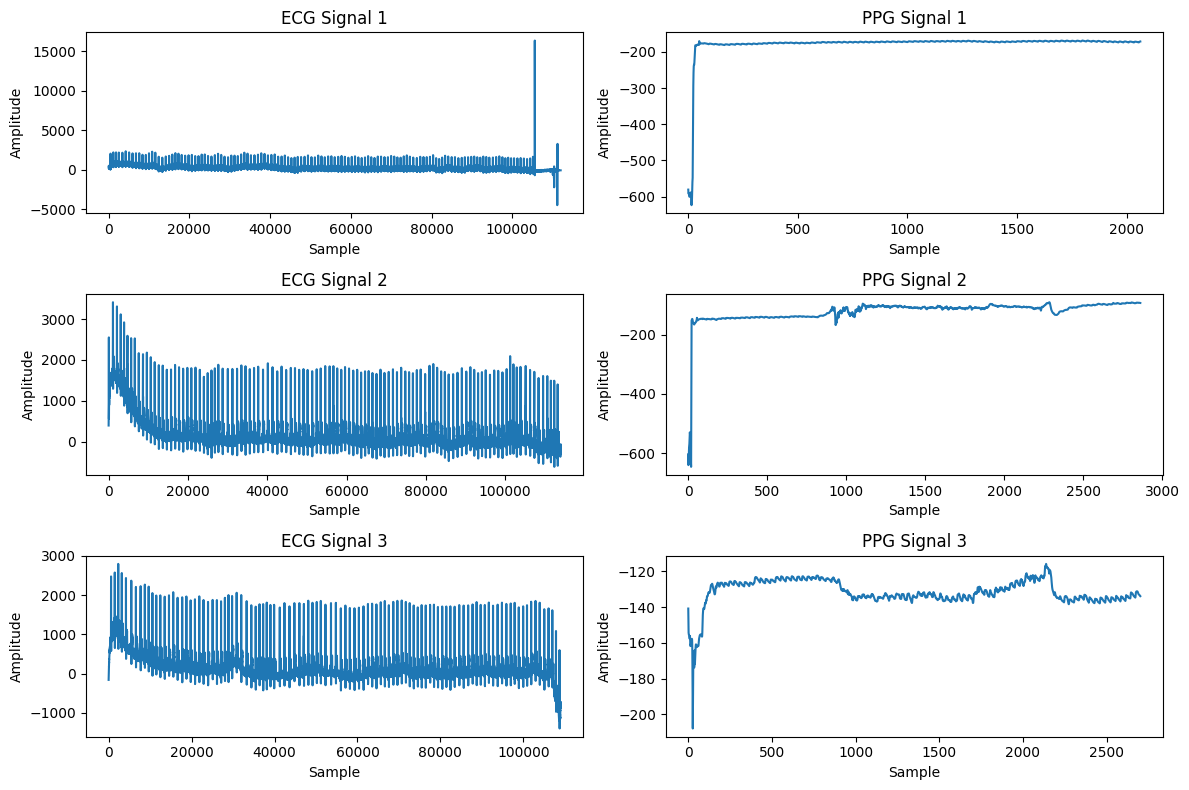

In [360]:
plt.figure(figsize=(12, 8))

# Plot ECG signals for visual inspection
plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1)
plt.title('ECG Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2)
plt.title('ECG Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3)
plt.title('ECG Signal 3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot PPG signals for visual inspection
plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1)
plt.title('PPG Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2)
plt.title('PPG Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3)
plt.title('PPG Signal 3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**Typical resting heart/pulse rates for healthy individuals range between 60-100 bpm. Use this knowledge to estimate the sampling rate. For example, if your calculated heart rate is around 75 bpm, and you have 75 peaks in a 1-second interval of your signal, then your sampling rate is likely 75 Hz.**

## Zoom in samples in before preprocessing ECG between signal 40000 to 50000 & zoom in PPG signal 1000 to 1500

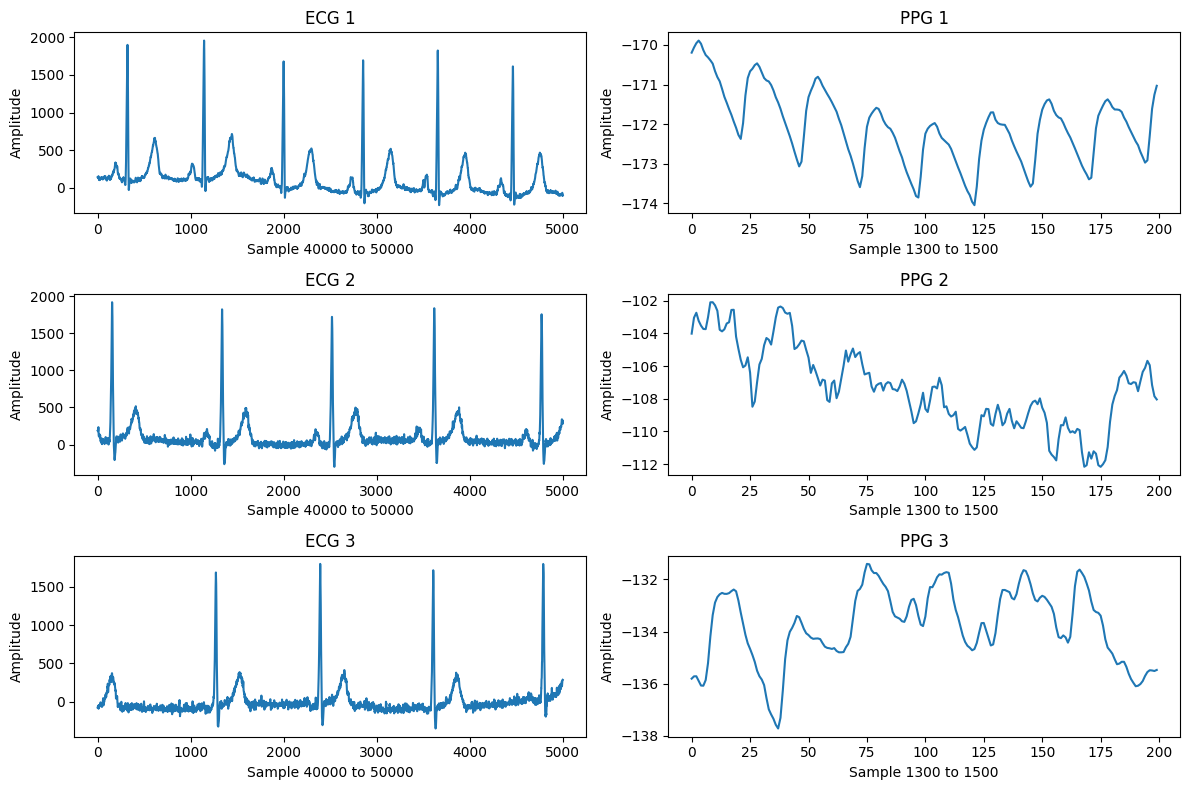

In [361]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(ecg_signal_1[40000:45000])
plt.title('ECG 1')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(ecg_signal_2[40000:45000])
plt.title('ECG 2')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(ecg_signal_3[40000:45000])
plt.title('ECG 3')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

# Plot PPG signals for visual inspection
plt.subplot(3, 2, 2)
plt.plot(ppg_signal_1[1300:1500])
plt.title('PPG 1')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(ppg_signal_2[1300:1500])
plt.title('PPG 2')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(ppg_signal_3[1300:1500])
plt.title('PPG 3')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# 2 - Preprocessing

- high frequency noise is near 1000
- Low frequency noise is near 0

## Removing high frequency noise, offset and trend

## ECG Filtering
- High-pass Filter:
- Purpose: Remove baseline wander (slow drifts) and movement artifacts.
- Typical Cutoff: 0.5 Hz (This preserves the P-wave and ST-segment).
- Low-pass Filter:
- Purpose: Reduce high-frequency noise (muscle activity, power line interference).
- Typical Cutoff: 40 Hz (This captures the QRS complex well).

## PPG Filtering

- High-pass Filter:
- Purpose: Similar to ECG, remove baseline wander and movement artifacts.
- Typical Cutoff: 0.5 - 1 Hz
- Low-pass Filter:
- Purpose: Attenuate high-frequency noise (often lower cutoff than ECG due to slower PPG signals).
- Typical Cutoff: 5 - 10 Hz

- Fs ECG:

fs_ecg = 250 Hz - 500 Hz: This range is commonly used in clinical settings and provides enough detail for most ECG analyses, including heart rate variability (HRV).
fs_ecg = 1000 Hz or higher: This is sometimes used in research settings for more detailed analysis or when specific high-frequency components are of interest.
- Fs PPG:

fs_ppg = 50 Hz - 100 Hz: This range is typically sufficient for heart rate monitoring and general analysis of the PPG waveform.
fs_ppg = 200 Hz or higher: Higher sampling rates might be used in research settings or for specific applications like pulse wave velocity (PWV) analysis.

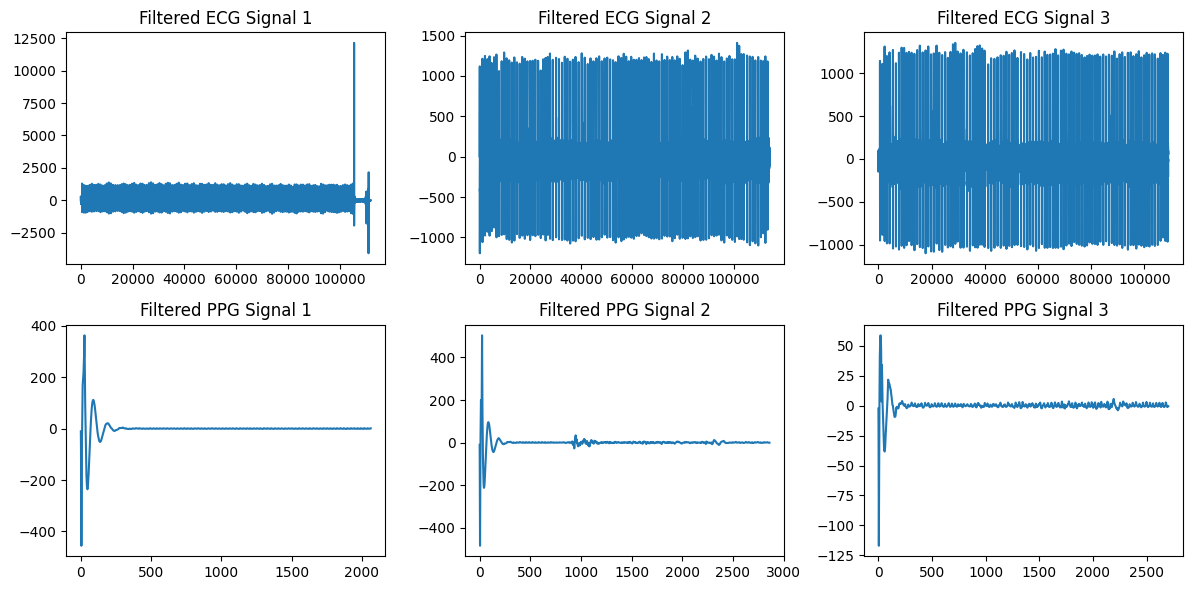

In [404]:
# Define butter_filter function
def butter_filter(signal, cutoffs, fs, order=5):
    nyquist = 0.5 * fs
    low, high = cutoffs
    low /= nyquist
    high /= nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# Sampling frequencies (Hz)
fs_ecg = 250
fs_ppg = 50

# Cutoff frequencies (Hz) 
ecg_cutoffs = [0.5, 40]   # Bandpass for ECG
ppg_cutoffs = [0.5, 10]   # Bandpass for PPG

# Preprocessing function
def preprocess_signal(signal, cutoffs, fs, remove_trend=True):
    # 1. Bandpass Filtering
    filtered_signal = butter_filter(signal, cutoffs, fs)

    # 2. Baseline Removal (Offset)
    filtered_signal -= np.mean(filtered_signal) 

    # 3. Detrending (Optional)
    if remove_trend:
        filtered_signal = detrend(filtered_signal)

    return filtered_signal

# Filter and preprocess signals
filtered_ecg_1 = preprocess_signal(ecg_signal_1, ecg_cutoffs, fs_ecg)
filtered_ecg_2 = preprocess_signal(ecg_signal_2, ecg_cutoffs, fs_ecg)
filtered_ecg_3 = preprocess_signal(ecg_signal_3, ecg_cutoffs, fs_ecg)

filtered_ppg_1 = preprocess_signal(ppg_signal_1, ppg_cutoffs, fs_ppg, remove_trend=False)
filtered_ppg_2 = preprocess_signal(ppg_signal_2, ppg_cutoffs, fs_ppg, remove_trend=False)
filtered_ppg_3 = preprocess_signal(ppg_signal_3, ppg_cutoffs, fs_ppg, remove_trend=False)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(filtered_ecg_1)
plt.title('Filtered ECG Signal 1')

plt.subplot(2, 3, 2)
plt.plot(filtered_ecg_2)
plt.title('Filtered ECG Signal 2')

plt.subplot(2, 3, 3)
plt.plot(filtered_ecg_3)
plt.title('Filtered ECG Signal 3')

plt.subplot(2, 3, 4)
plt.plot(filtered_ppg_1)
plt.title('Filtered PPG Signal 1')

plt.subplot(2, 3, 5)
plt.plot(filtered_ppg_2)
plt.title('Filtered PPG Signal 2')

plt.subplot(2, 3, 6)
plt.plot(filtered_ppg_3)
plt.title('Filtered PPG Signal 3')

plt.tight_layout()
plt.show()

## Zoom in samples after preprocessing in ECG between signal 40000 to 50000 & zoom in PPG signal 1300 to 1500

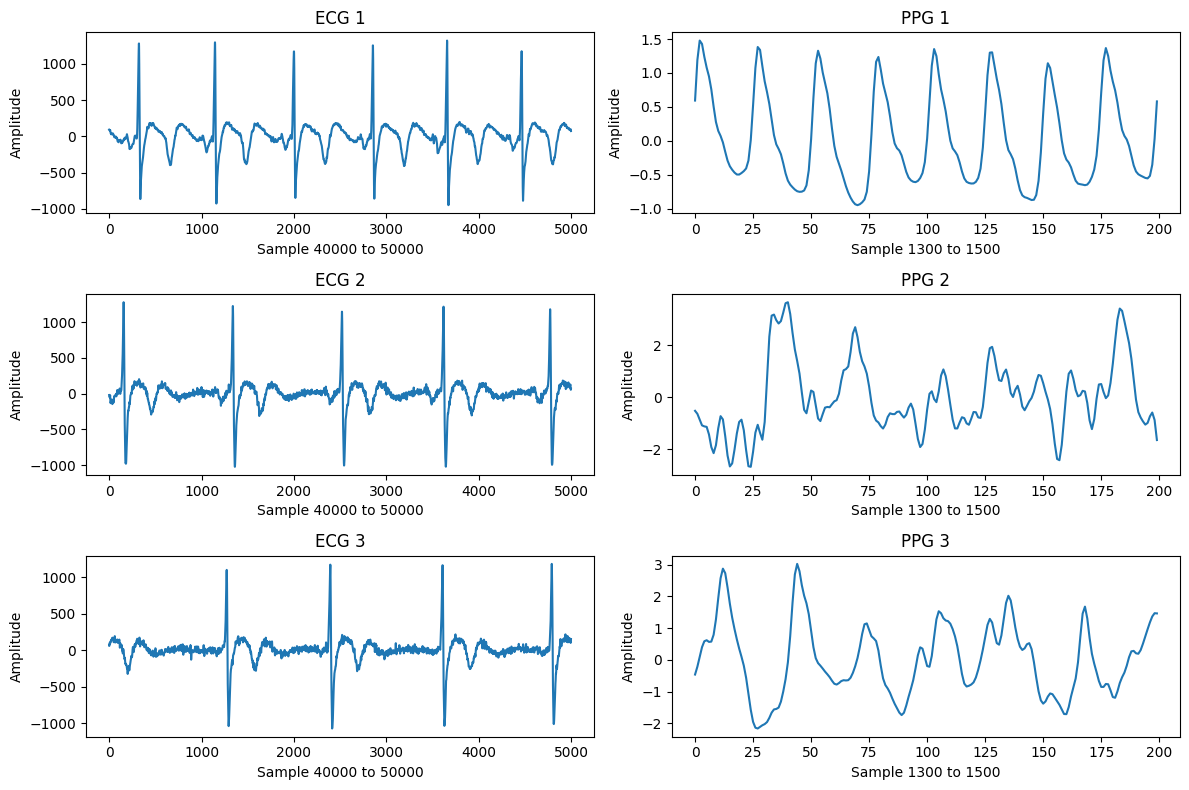

In [405]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(filtered_ecg_1[40000:45000])
plt.title('ECG 1')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(filtered_ecg_2[40000:45000])
plt.title('ECG 2')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(filtered_ecg_3[40000:45000])
plt.title('ECG 3')
plt.xlabel('Sample 40000 to 50000')
plt.ylabel('Amplitude')

# Plot PPG signals for visual inspection
plt.subplot(3, 2, 2)
plt.plot(filtered_ppg_1[1300:1500])
plt.title('PPG 1')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(filtered_ppg_2[1300:1500])
plt.title('PPG 2')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
plt.plot(filtered_ppg_3[1300:1500])
plt.title('PPG 3')
plt.xlabel('Sample 1300 to 1500')
plt.ylabel('Amplitude')

plt.tight_layout()

# 3 - Peak detection

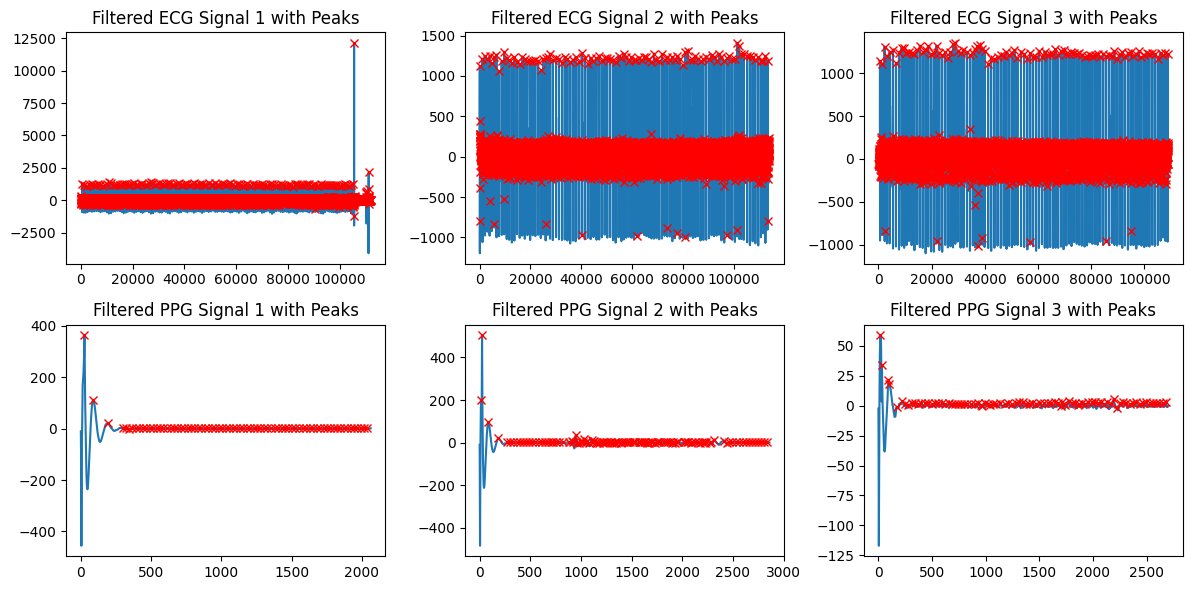

In [406]:
def detect_peaks(signal, prominence=0.5, distance=10):  
    peaks, _ = find_peaks(signal, prominence=prominence, distance=distance)
    return peaks

# Detect ECG peaks
ecg_peaks_1 = detect_peaks(filtered_ecg_1)  
ecg_peaks_2 = detect_peaks(filtered_ecg_2)  
ecg_peaks_3 = detect_peaks(filtered_ecg_3)  


# Detect PPG peaks
ppg_peaks_1 = detect_peaks(filtered_ppg_1)  
ppg_peaks_2 = detect_peaks(filtered_ppg_2) 
ppg_peaks_3 = detect_peaks(filtered_ppg_3) 


plt.figure(figsize=(12, 6))

# ECG Plots
plt.subplot(2, 3, 1) 
plt.plot(filtered_ecg_1)
plt.plot(ecg_peaks_1, filtered_ecg_1[ecg_peaks_1], "x", color="red")
plt.title('Filtered ECG Signal 1 with Peaks')

plt.subplot(2, 3, 2) 
plt.plot(filtered_ecg_2)
plt.plot(ecg_peaks_2, filtered_ecg_2[ecg_peaks_2], "x", color="red") 
plt.title('Filtered ECG Signal 2 with Peaks')

plt.subplot(2, 3, 3)
plt.plot(filtered_ecg_3)
plt.plot(ecg_peaks_3, filtered_ecg_3[ecg_peaks_3], "x", color="red")  
plt.title('Filtered ECG Signal 3 with Peaks')

# PPG Plots
plt.subplot(2, 3, 4)  
plt.plot(filtered_ppg_1)
plt.plot(ppg_peaks_1, filtered_ppg_1[ppg_peaks_1], "x", color="red")
plt.title('Filtered PPG Signal 1 with Peaks')

plt.subplot(2, 3, 5)
plt.plot(filtered_ppg_2)
plt.plot(ppg_peaks_2, filtered_ppg_2[ppg_peaks_2], "x", color="red")
plt.title('Filtered PPG Signal 2 with Peaks')

plt.subplot(2, 3, 6)
plt.plot(filtered_ppg_3)
plt.plot(ppg_peaks_3, filtered_ppg_3[ppg_peaks_3], "x", color="red")
plt.title('Filtered PPG Signal 3 with Peaks')

plt.tight_layout()
plt.show();

## zoom in for peaks

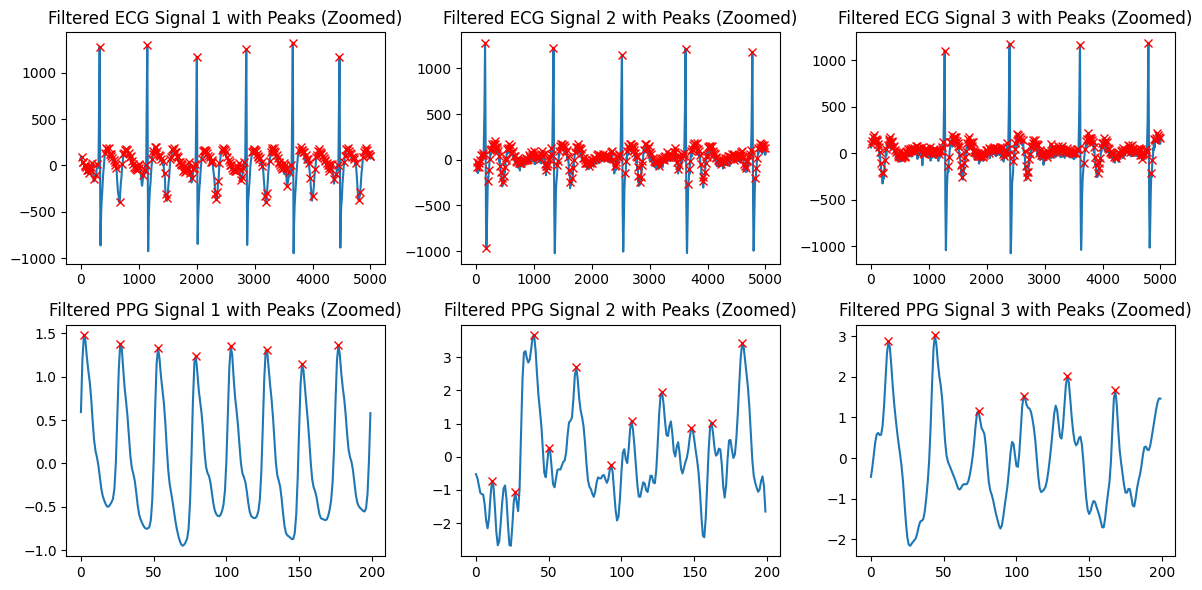

In [407]:
ecg_zoom_range = [40000, 45000]
ppg_zoom_range = [1300, 1500]

# Plot results with peaks 
plt.figure(figsize=(12, 6))

for i in range(1, 4): 
    plt.subplot(2, 3, i)  
    filtered_ecg = locals()[f"filtered_ecg_{i}"]  
    ecg_peaks = locals()[f"ecg_peaks_{i}"]
    plt.plot(filtered_ecg[ecg_zoom_range[0]:ecg_zoom_range[1]])
    plt.plot(ecg_peaks[(ecg_peaks >= ecg_zoom_range[0]) & (ecg_peaks < ecg_zoom_range[1])] - ecg_zoom_range[0], 
             filtered_ecg[ecg_peaks[(ecg_peaks >= ecg_zoom_range[0]) & (ecg_peaks < ecg_zoom_range[1])]],
             "x", color="red")
    plt.title(f'Filtered ECG Signal {i} with Peaks (Zoomed)')

# PPG Plots 
for i in range(1, 4):
    plt.subplot(2, 3, i+3) 
    filtered_ppg = locals()[f"filtered_ppg_{i}"] 
    ppg_peaks = locals()[f"ppg_peaks_{i}"]
    plt.plot(filtered_ppg[ppg_zoom_range[0]:ppg_zoom_range[1]])
    plt.plot(ppg_peaks[(ppg_peaks >= ppg_zoom_range[0]) & (ppg_peaks < ppg_zoom_range[1])] - ppg_zoom_range[0], 
             filtered_ppg[ppg_peaks[(ppg_peaks >= ppg_zoom_range[0]) & (ppg_peaks < ppg_zoom_range[1])]],
             "x", color="red")
    plt.title(f'Filtered PPG Signal {i} with Peaks (Zoomed)')

plt.tight_layout()
plt.show()

# 4 - Anomalies in the PPG signals

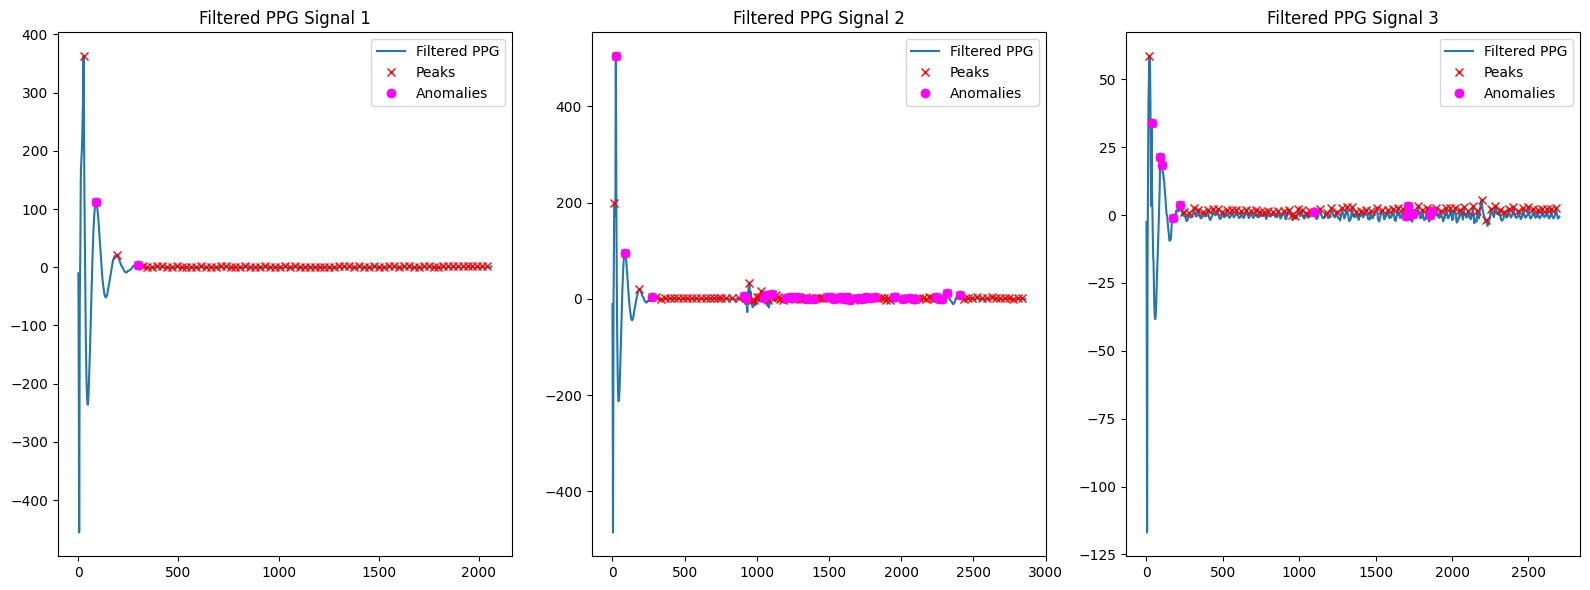

In [408]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

def detect_ppg_anomalies(filtered_ppg, peaks, threshold=3.0, window_size=10):
    anomalies = []
    for i in range(len(peaks)):
        start = max(0, peaks[i] - window_size // 2)
        end = min(len(filtered_ppg), peaks[i] + window_size // 2)
        segment = filtered_ppg[start:end]
        if np.abs(zscore(segment)).max() > threshold: 
            anomalies.append(peaks[i])

        if 1 <= i < len(peaks) - 1:  # Check boundaries
            prev_ibi = peaks[i] - peaks[i - 1]
            next_ibi = peaks[i + 1] - peaks[i]
            current_ibi = (prev_ibi + next_ibi) / 2
            if abs(current_ibi - prev_ibi) / current_ibi > 0.2 or abs(current_ibi - next_ibi) / current_ibi > 0.2:
                anomalies.append(peaks[i])
    return np.unique(anomalies)

# Plot results with increased figure size
plt.figure(figsize=(16, 6))  # Adjusted figure size for larger plots

for i in range(1, 4):
    filtered_ppg = locals()[f"filtered_ppg_{i}"]
    ppg_peaks = locals()[f"ppg_peaks_{i}"]
    ppg_anomalies = detect_ppg_anomalies(filtered_ppg, ppg_peaks)

    plt.subplot(1, 3, i)  # Changed to 1 row, 3 columns
    plt.plot(filtered_ppg, label="Filtered PPG")
    plt.plot(ppg_peaks, filtered_ppg[ppg_peaks], "x", color="red", label="Peaks")
    if len(ppg_anomalies) > 0:
        plt.plot(ppg_anomalies, filtered_ppg[ppg_anomalies], "o", color="magenta", label="Anomalies")
    plt.title(f'Filtered PPG Signal {i}')
    plt.legend()

plt.tight_layout()
plt.show()


## Zoomed frame for anomalies

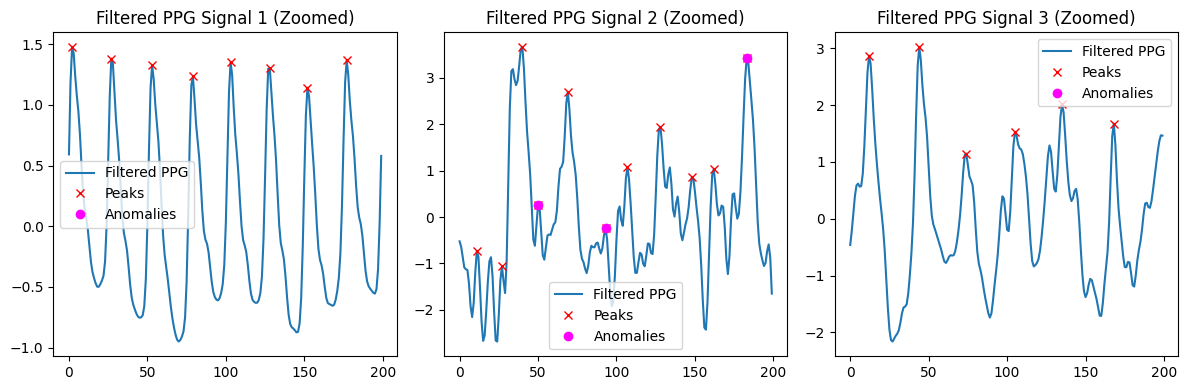

In [409]:
def detect_ppg_anomalies(filtered_ppg, peaks, threshold=3.0, window_size=10):
    anomalies = []
    for i in range(len(peaks)):
        start = max(0, peaks[i] - window_size // 2)
        end = min(len(filtered_ppg), peaks[i] + window_size // 2)
        segment = filtered_ppg[start:end]
        if np.abs(zscore(segment)).max() > threshold: 
            anomalies.append(peaks[i])

        if 1 <= i < len(peaks) - 1:  # Check boundaries
            prev_ibi = peaks[i] - peaks[i - 1]
            next_ibi = peaks[i + 1] - peaks[i]
            current_ibi = (prev_ibi + next_ibi) / 2
            if abs(current_ibi - prev_ibi) / current_ibi > 0.2 or abs(current_ibi - next_ibi) / current_ibi > 0.2:
                anomalies.append(peaks[i])
    return np.unique(anomalies)


ppg_zoom_range = [1300, 1500]

# Plot results
plt.figure(figsize=(12, 4))  # Adjusted figure size

for i in range(1, 4):
    filtered_ppg = locals()[f"filtered_ppg_{i}"]
    ppg_peaks = locals()[f"ppg_peaks_{i}"]
    ppg_anomalies = detect_ppg_anomalies(filtered_ppg, ppg_peaks)

    plt.subplot(1, 3, i)  # Changed to 1 row, 3 columns
    plt.plot(filtered_ppg[ppg_zoom_range[0]:ppg_zoom_range[1]], label="Filtered PPG")
    plt.plot(ppg_peaks[(ppg_peaks >= ppg_zoom_range[0]) & (ppg_peaks < ppg_zoom_range[1])] - ppg_zoom_range[0],
             filtered_ppg[ppg_peaks[(ppg_peaks >= ppg_zoom_range[0]) & (ppg_peaks < ppg_zoom_range[1])]],
             "x", color="red", label="Peaks")
    if len(ppg_anomalies) > 0:
        plt.plot(ppg_anomalies[(ppg_anomalies >= ppg_zoom_range[0]) & (ppg_anomalies < ppg_zoom_range[1])] - ppg_zoom_range[0],
                 filtered_ppg[ppg_anomalies[(ppg_anomalies >= ppg_zoom_range[0]) & (ppg_anomalies < ppg_zoom_range[1])]],
                 "o", color="magenta", label="Anomalies")
    plt.title(f'Filtered PPG Signal {i} (Zoomed)')
    plt.legend()

plt.tight_layout()
plt.show()


# 5 - Synchronize ECG and PPG Signals

In [436]:
from scipy.signal import resample

def resample_signal(signal, target_length):
    return resample(signal, target_length)

# Resample ECG signals to match PPG signal length
resampled_ecg_1 = resample_signal(filtered_ecg_1, len(filtered_ppg_1))
resampled_ecg_2 = resample_signal(filtered_ecg_2, len(filtered_ppg_2))
resampled_ecg_3 = resample_signal(filtered_ecg_3, len(filtered_ppg_3))

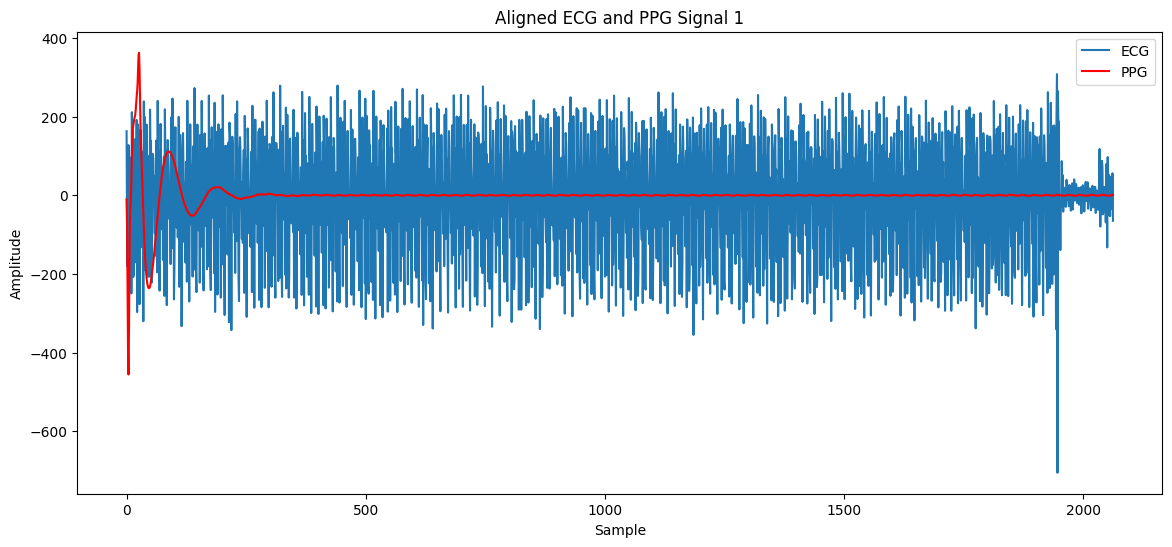

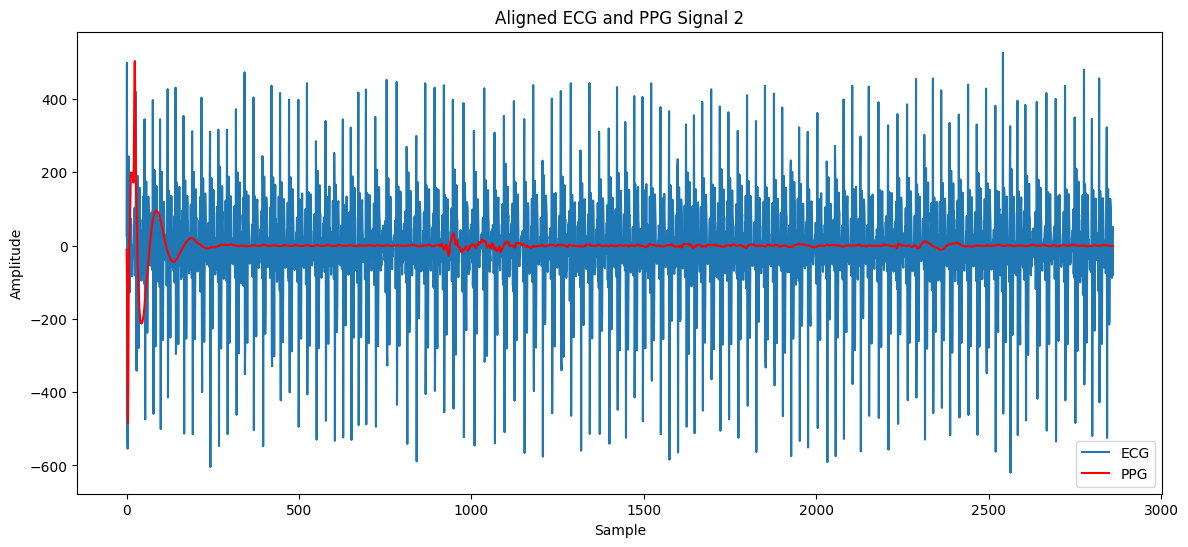

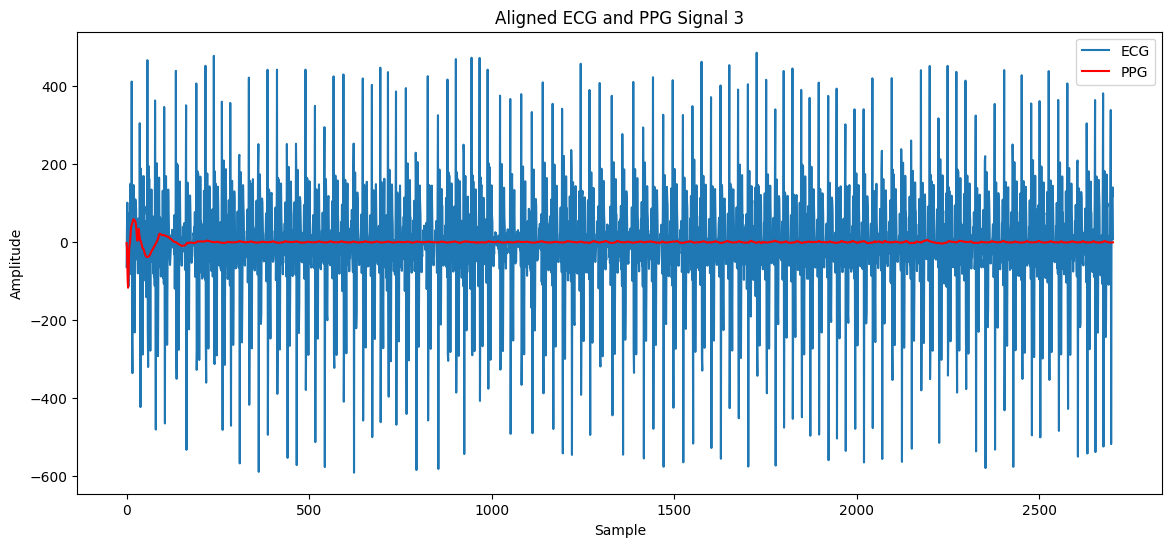

In [443]:
def plot_signals(ecg, ppg, title, zoom_range=None):
    plt.figure(figsize=(14, 6))
    plt.plot(ecg, label="ECG")
    plt.plot(ppg, label="PPG", color='red')
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    if zoom_range:
        plt.xlim(zoom_range)
    plt.legend()
    plt.show()

zoom_range = ()

# Plot aligned signals with zoom for three sets of data
plot_signals(resampled_ecg_1, filtered_ppg_1, "Aligned ECG and PPG Signal 1", zoom_range)
plot_signals(resampled_ecg_2, filtered_ppg_2, "Aligned ECG and PPG Signal 2", zoom_range)
plot_signals(resampled_ecg_3, filtered_ppg_3, "Aligned ECG and PPG Signal 3", zoom_range)


# 6 - Order the three PPG signals from best to worst

In [445]:
from scipy.signal import find_peaks

def detect_peaks(signal, distance=50, prominence=0.5):
    """Detect peaks in the PPG signal."""
    peaks, _ = find_peaks(signal, distance=distance, prominence=prominence)
    return peaks


In [449]:
import numpy as np

def calculate_snr(signal, peaks):
    signal_power = np.mean(signal[peaks]**2)
    noise_power = np.mean((signal - np.mean(signal))**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_peak_prominence(signal, peaks):
    prominences = signal[peaks] - np.mean(signal)
    return np.mean(prominences)

def calculate_peak_variability(peaks):
    intervals = np.diff(peaks)
    variability = np.std(intervals) / np.mean(intervals)
    return variability

def evaluate_signal(signal):
    peaks = detect_peaks(signal)
    snr = calculate_snr(signal, peaks)
    prominence = calculate_peak_prominence(signal, peaks)
    variability = calculate_peak_variability(peaks)
    return snr, prominence, variability


In [450]:
# Evaluate each signal
evaluation_1 = evaluate_signal(filtered_ppg_1)
evaluation_2 = evaluate_signal(filtered_ppg_2)
evaluation_3 = evaluate_signal(filtered_ppg_3)

# Combine the metrics into a single score
# Higher SNR and prominence are better, lower variability is better
def combine_metrics(snr, prominence, variability):
    return snr + prominence - variability

score_1 = combine_metrics(*evaluation_1)
score_2 = combine_metrics(*evaluation_2)
score_3 = combine_metrics(*evaluation_3)

# Rank the signals
scores = [score_1, score_2, score_3]
signals = ['PPG 1', 'PPG 2', 'PPG 3']
ranking = sorted(zip(scores, signals), reverse=True)

# Output the ranking
for rank, (score, signal) in enumerate(ranking, 1):
    print(f"Rank {rank}: {signal} with score {score:.2f}")


Rank 1: PPG 2 with score 28.47
Rank 2: PPG 1 with score 25.84
Rank 3: PPG 3 with score 7.80


## Baesd on Calculate Evaluation Metrics Computing SNR, peak prominence, and peak variability **PPG 2 has higher score with 28.47**.

# Refrences

https://swharden.com/blog/2009-01-21-signal-filtering-with-python/

https://github.com/HealthSciTech/E2E-PPG

https://www.biorxiv.org/content/10.1101/815258v1.full

https://www.gehealthcare.com/insights/article/a-guide-to-ecg-signal-filtering

https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/heartrateanalysis.html